In [13]:
# Programa no ambiente do notebook
import pandas as pd  # Biblioteca para análise de dados
import matplotlib.pyplot as plt  # Biblioteca para plotar gráficos
import ast  # Para tratar escapes Unicode corretamente
#import seaborn as sns  # Biblioteca opcional para visualização
#sns.set(style="darkgrid")

# Função para corrigir caracteres Unicode escapados
def decode_unicode(text):
    if isinstance(text, str):
        try:
            return ast.literal_eval(f'"{text}"')  # Decodifica Unicode no estilo JSON
        except Exception:
            return text  # Retorna o texto original em caso de erro
    return text

# Lê o arquivo gerado anteriormente
df = pd.read_csv('posts_details_marina_silva.tsv', sep='\t', encoding='utf-8')  # Define o separador como tab (\t)

# Aplica a decodificação à coluna de mensagens
df['message'] = df['message'].fillna('').apply(decode_unicode)

# Exibe as primeiras 5 linhas do arquivo
df.head()


,post_id,date,message,num_likes,num_angry,num_shares
0,126351747376464_167692726605336,2010-12-23T11:39:11+0000,O artigo “Uma evolução silenciosa” é a contrib...,305,0,0
1,126351747376464_151289684920710,2010-12-21T23:13:14+0000,Marina Silva propõe uma reflexão sobre um mund...,622,0,3
2,126351747376464_170468159659839,2010-12-17T12:54:54+0000,"Sobre o futuro Marina disse que, a priori, não...",678,0,1
3,126351747376464_152803114767819,2010-12-16T12:03:58+0000,Convocamos todos da #OndaVerde para twittarem:...,391,0,0
4,126351747376464_177914302228301,2010-12-14T12:50:16+0000,Segundo revista Marina é uma das líderes mais ...,763,0,7


C:\Users\israe\AppData\Local\Temp\ipykernel_19252\3754968357.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  likes_over_time = df['num_likes'].resample('M').sum()  # Soma os likes por mês


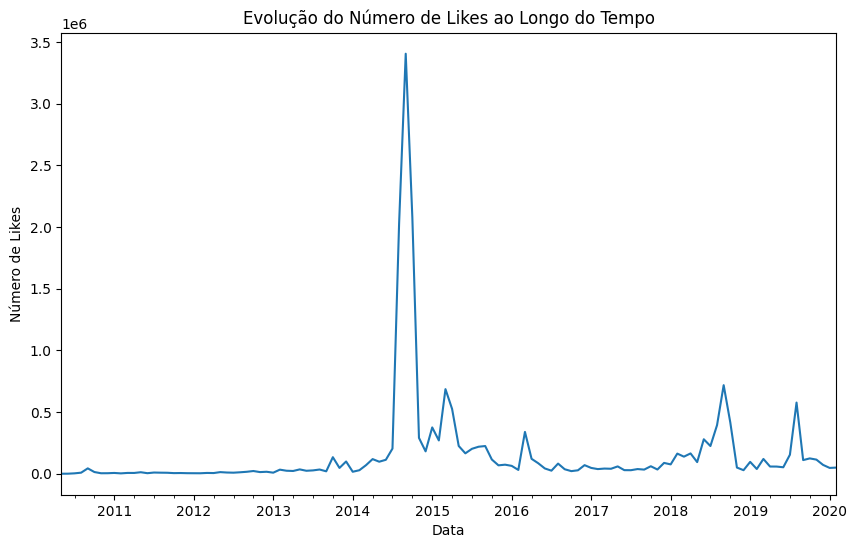

In [14]:
df['date'] = pd.to_datetime(df['date'])  # Converte a coluna 'date' para datetime
df.set_index('date', inplace=True)  # Define a data como índice
likes_over_time = df['num_likes'].resample('M').sum()  # Soma os likes por mês

# Plot
likes_over_time.plot(title='Evolução do Número de Likes ao Longo do Tempo', figsize=(10, 6))
plt.xlabel('Data')
plt.ylabel('Número de Likes')
plt.show()


Média de curtidas por postagem: 3663.44
Média de reações 'angry' por postagem: 37.34
Média de compartilhamentos por postagem: 1224.78


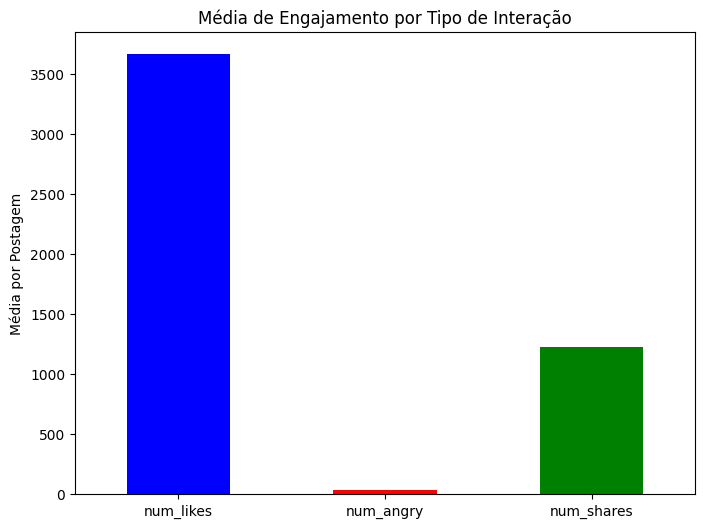

In [15]:
total_posts = len(df)
avg_likes = df['num_likes'].mean()
avg_angry = df['num_angry'].mean()
avg_shares = df['num_shares'].mean()

print(f"Média de curtidas por postagem: {avg_likes:.2f}")
print(f"Média de reações 'angry' por postagem: {avg_angry:.2f}")
print(f"Média de compartilhamentos por postagem: {avg_shares:.2f}")

# Gráfico de barras para comparação
df[['num_likes', 'num_angry', 'num_shares']].mean().plot(kind='bar', figsize=(8, 6), color=['blue', 'red', 'green'])
plt.title('Média de Engajamento por Tipo de Interação')
plt.ylabel('Média por Postagem')
plt.xticks(rotation=0)
plt.show()


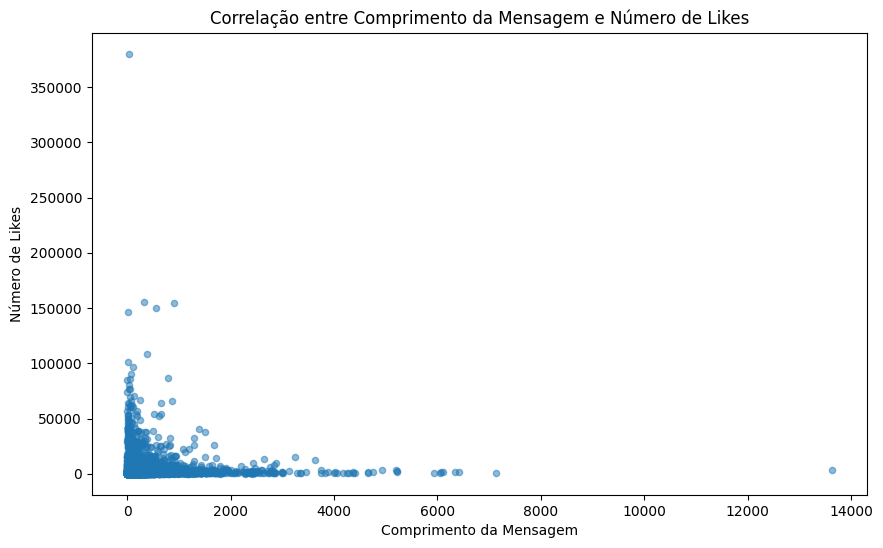

Correlação entre comprimento da mensagem e número de likes: -0.04


In [16]:
# Substitui valores NaN por string vazia
df['message'] = df['message'].fillna('')

# Calcula o comprimento de cada mensagem
df['message_length'] = df['message'].apply(len)

# Scatter plot entre comprimento das mensagens e número de curtidas
df.plot.scatter(x='message_length', y='num_likes', alpha=0.5, figsize=(10, 6))
plt.title('Correlação entre Comprimento da Mensagem e Número de Likes')
plt.xlabel('Comprimento da Mensagem')
plt.ylabel('Número de Likes')
plt.show()

# Cálculo de correlação
correlation = df['message_length'].corr(df['num_likes'])
print(f"Correlação entre comprimento da mensagem e número de likes: {correlation:.2f}")


In [19]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\israe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


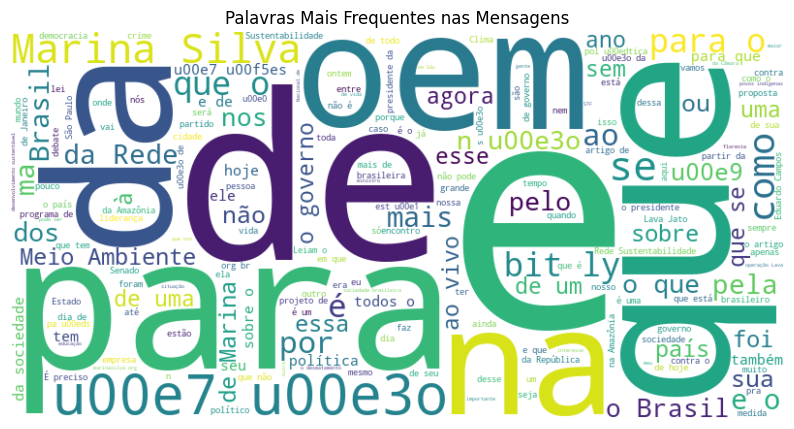

Média de likes para postagens com a palavra 'meio ambiente': 2286.12


In [20]:
from wordcloud import WordCloud
from collections import Counter

# Combina todas as mensagens em uma string
all_messages = ' '.join(df['message'].dropna())

# Gera a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Mais Frequentes nas Mensagens')
plt.show()

# Exemplo de análise de uma palavra específica (ex.: "meio ambiente")
keyword = 'meio ambiente'
posts_with_keyword = df[df['message'].str.contains(keyword, case=False, na=False)]
avg_likes_keyword = posts_with_keyword['num_likes'].mean()
print(f"Média de likes para postagens com a palavra '{keyword}': {avg_likes_keyword:.2f}")
